# Qiskit Notebook 5 - Fault Tolerant Quantum Algorithms II - Quantum Phase Estimation and Shor's Algorithm


In this Notebook, we will learn about:

- Quantum Phase Estimation
- Order-Finding Problem
- Shor's Algorithm

In [1]:
# If using Google Colab, uncomment the following

#!pip install -q qiskit
#!pip install -q qiskit[visualization]
#!pip install -q qiskit-ibm-runtime
#!pip install -q qiskit-aer

# Quantum Phase Estimation

The **Quantum Phase Estimation** (QPE) algorithm is one of the most important subroutines in Fault-Tolerant Quantum Computing. The objective of the algorithm is as follows:

Given a unitary matrix $U$ and the state $|\psi\rangle$, which corresponds to an eigenstate of $U$, the QPE algorithm finds the **phase** $\theta$ from the equation

$$U |\psi\rangle = e^{2\pi i \theta} |\psi\rangle, \quad \theta \in [0,1)$$

that is, we have to identify the **eigenvalue for the corresponding eigenstate** $|\psi\rangle$. This routine is implemented through the following circuit:

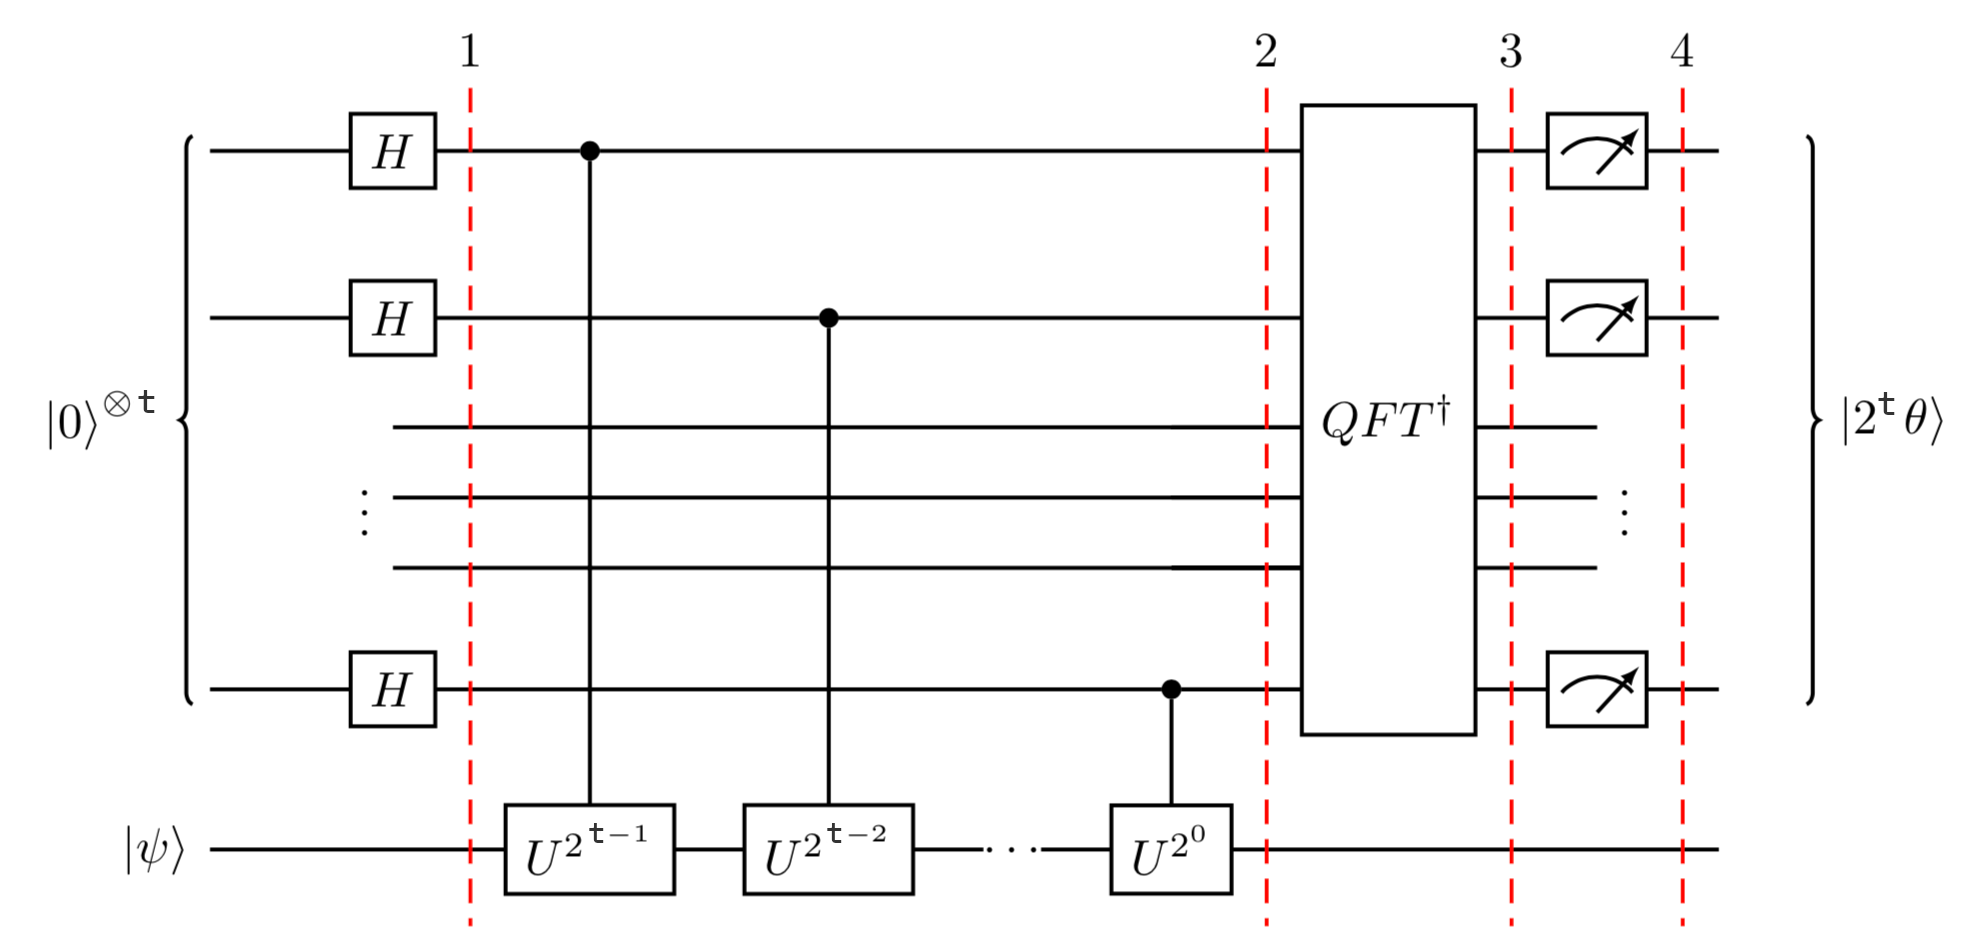

The circuit acts in the following way:

0. The eigenstate $|\psi\rangle$ is prepared on a quantum register, and we add a counting (ancillary) register of $n$ qubits, which will store the value of $2 n \theta$,

$$|\psi_0\rangle = |0\rangle^{\otimes n} \otimes |\psi\rangle.$$

1.   Apply the Hadamard transform over the counting register $|0\rangle^{\otimes n}$,

$$|\psi_1\rangle = \frac{1}{\sqrt{2^n}} (|0\rangle + |1\rangle)^{\otimes n} \otimes |\psi\rangle. $$

2.   Define the control operation $CU$, which applies our target unitary $U$ over the quantum register only if the control qubit is $|1\rangle$, and $CU^{2^j}$, which applies the target unitary $2^j$ times:

$$CU = \left(\begin{matrix}
I&0\\
0&U\\
\end{matrix}\right), \quad CU^{2^j} = \left(\begin{matrix}
I&0\\
0&U^{2^j}\\
\end{matrix}\right) $$

As $|\psi\rangle$ is an eigenstate of $U$, it must satisfy that

$$U^{2^{j}}|\psi \rangle =U^{2^{j}-1}U|\psi \rangle =U^{2^{j}-1}e^{2\pi i\theta }|\psi \rangle =\cdots =e^{2\pi i2^{j}\theta }|\psi \rangle$$

We apply repeatedly the control unitary $CU^{2^j}$ over the quantum register, controlled by qubit $j$, where $0\leq j\leq n-1$. Notice that using the following relation

$$CU^{2^{j}} \left[\left(|0\rangle + |1\rangle \right) \otimes |\psi\rangle \right] = |0\rangle \otimes |\psi \rangle +|1\rangle \otimes e^{2\pi i2^{j}\theta }|\psi \rangle =\left[|0\rangle +e^{2\pi i2^{j}\theta }|1\rangle \right]\otimes |\psi \rangle$$

we have that

$$|\psi_{2}\rangle =\frac{1}{\sqrt{2^n}} \left[|0\rangle+{e^{{2\pi i} \theta 2^{n-1}}}|1\rangle \right] \otimes \cdots \otimes \left[|0\rangle+{e^{{2\pi i} \theta 2^{1}}}\vert1\rangle \right] \otimes \left[|0\rangle+{e^{{2\pi i} \theta 2^{0}}}\vert1\rangle \right] \otimes |\psi\rangle = \frac{1}{\sqrt{2^n}} \sum _{y=0}^{2^{n}-1}e^{{2\pi i} \theta y}|y\rangle \otimes \vert\psi\rangle$$

where $y$ corresponds to the integer representation of the binary number of $n$-bits.

3.  Notice that the result is equivalent to applying the  Quantum Fourier Transform, replacing $x$ with $2^{n} \theta$


\begin{aligned}
QFT_{n}\vert x \rangle & = \frac{1}{\sqrt{2^n}} \sum_{y=0}^{2^n-1} \exp{\biggl(\frac{2 \pi i xy}{2^n}\biggr)}  \vert y \rangle,
\\
& = \frac{1}{\sqrt{2^n}} \bigotimes_{k=1}^n  \left[\vert0\rangle + \exp{\biggl( \frac{2 \pi i}{2^k} x \biggr)} \vert1\rangle \right],
\\
& = \frac{1}{\sqrt{2^n}}
\left[\vert0\rangle + \exp{\biggl(\frac{2\pi i}{2}x\biggr)} \vert1\rangle\right] 
\otimes
\left[\vert0\rangle + \exp{\biggl(\frac{2\pi i}{2^2}x\biggr)} \vert1\rangle\right] 
\otimes  
\ldots
\otimes
\left[\vert0\rangle + \exp{\biggl(\frac{2\pi i}{2^{n-1}}x\biggr)} \vert1\rangle\right]
\otimes
\left[\vert0\rangle + \exp{\biggl(\frac{2\pi i}{2^n}x\biggr)} \vert1\rangle\right]
\end{aligned}

Then, if we apply the inverse QFT over the auxiliary register, we will be able to find the state $|2^{n} \theta\rangle$:

$$\vert\psi_3\rangle = \frac{1}{\sqrt{2^n}} \sum _{y=0}^{2^{n}-1}e^{{2\pi i} \theta y}|y\rangle \otimes | \psi \rangle \xrightarrow{{QFT}_n^{-1}} \frac {1}{2^n}\sum _{x=0}^{2^{n}-1}\sum _{y=0}^{2^{n}-1} \exp{\biggl({2\pi i y}\biggl[\theta - \frac{x}{2^n}\biggr]\biggr)} |x\rangle \otimes |\psi\rangle,$$

where the inverse QFT corresponds to

$$ QFT_{n}^{-1}\vert y \rangle = \frac{1}{\sqrt{2^n}} \sum_{y=0}^{2^n-1} \exp{\biggl(- \frac{2 \pi i xy}{2^n}\biggr)}  \vert x \rangle.$$

4.  We measure the auxiliary register in the computational basis. We observe that each outcome $x$ occurs with probability

$$ p_x = \biggl| \frac{1}{{2^n}} \sum _{x=0}^{2^{n}-1}  \exp{\biggl({2\pi i y}\biggl[\theta - \frac{x}{2^n}\biggr]\biggr)} \biggr|^2 $$

If the phase $\theta$ can be **written with $n$ bits of precision** (that is, if $2^{n} \theta = x$), we find the correct phase with probability $p_x = 1$. If $2^n \theta$ is not an integer (i.e. when $\theta$ cannot be written with $n$ bits of precision), it is still possible to find the phase with this algorithm, with an accuracy greater than $4/\pi^2 \approx 40\%$.

As an example, lets use the QPE algorithm to estimate the phase of the $T$ gate, that is, we want to obtain the phase $\theta$ such that

$$T|1\rangle = e^{2i\pi\theta}|1\rangle, \quad T= 
\begin{bmatrix}
1 & 0\\
0 & e^\frac{i\pi}{4}\\ 
\end{bmatrix}.$$

Clearly, $|\psi \rangle = |1 \rangle$, and we expect that $\theta = \frac{1}{8}$, so we need at least 3 qubits in our auxiliary register, as $2^3 \theta = 1$.

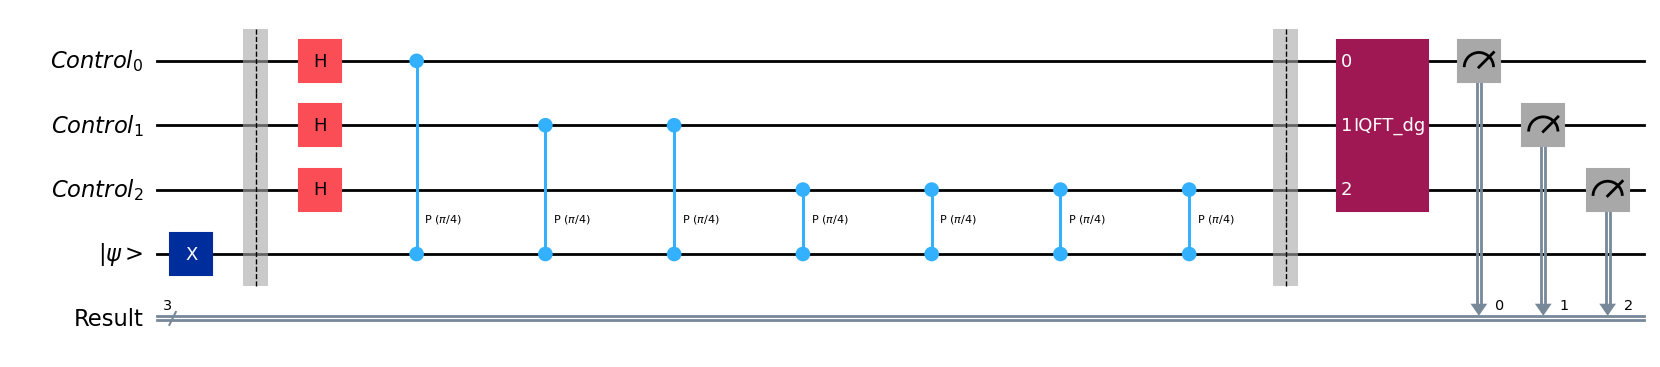

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.transpiler import generate_preset_pass_manager
import numpy as np

n = 3

control_register = QuantumRegister(n, name="Control")
target_register = QuantumRegister(1, name="|ψ>")
output_register = ClassicalRegister(n, name="Result")

qpe = QuantumCircuit(control_register, target_register, output_register)

# Initialize qubit register in state |1>

qpe.x(target_register)
qpe.barrier()

# Apply Hadamard transform to the auxiliary (counting) register
qpe.h(control_register)

# Apply controlled unitary operations

for index, counting_qubit in enumerate(control_register):
    for _ in range(2**index):
        qpe.cp(np.pi/4, counting_qubit, target_register)
qpe.barrier()

# Apply inverse QFT

qpe.compose(QFT(n, inverse=True), range(n), inplace=True)

qpe.measure(control_register, output_register)
qpe.draw('mpl')

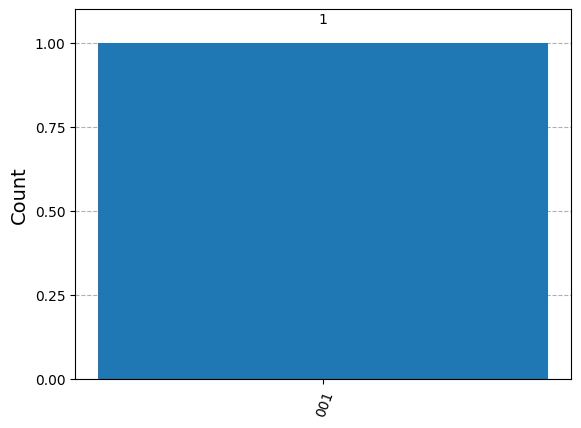

In [4]:
backend = AerSimulator()
shots = 1

pm = generate_preset_pass_manager(backend=backend)
t_qpe = pm.run(qpe)

answer = backend.run(t_qpe, backend=backend, shots=shots).result().get_counts()

plot_histogram(answer)

The measured value $001$ corresponds in integer notation to $1$, then

$$\theta = \frac{1}{2^3} = \frac{1}{8}.$$

Let us consider now the case where $\theta = \frac{1}{3}$. Clearly, $\theta=0.3333 \ldots$ corresponds to a repeating decimal number, so we cannot find an exact result as before. What we can do is verify how the accuracy of the QPE algorithm increases as we increase the number of qubits.

In [5]:
# Let us define a function to create the Quantum Phase Estimation circuit with a precision of n qubits

def qpe_func(theta, n):

  control_register = QuantumRegister(n, name="Control")
  target_register = QuantumRegister(1, name="|ψ>")
  output_register = ClassicalRegister(n, name="Result")

  qpe = QuantumCircuit(control_register, target_register, output_register)
  qpe.x(target_register)
  
  qpe.h(range(n))

  for index, counting_qubit in enumerate(control_register):
    for _ in range(2**index):
        qpe.cp(2*np.pi*theta, counting_qubit, target_register)


  qpe.compose(QFT(n, inverse=True), range(n), inplace=True)
  qpe.measure(range(n), range(n))

  return qpe

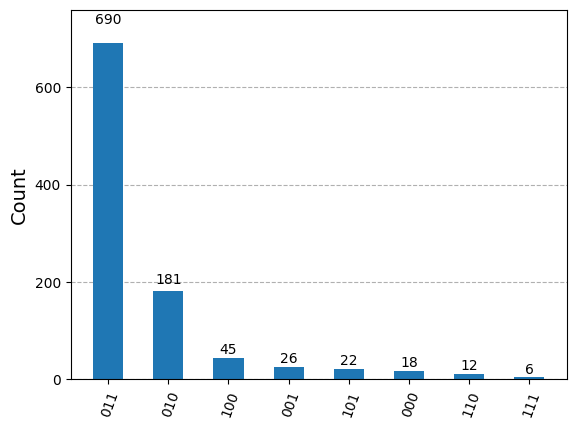

In [6]:
# Three qubit example

n = 3
shots = 1000
theta=1/3

circuit_qpe = qpe_func(theta, n)

pm = generate_preset_pass_manager(backend=backend)
t_qpe = pm.run(circuit_qpe)
answer = backend.run(t_qpe, shots=shots).result().get_counts()

plot_histogram(answer, number_to_keep=10, sort='value_desc')

In [7]:
# We consider the results with states with the highest number of counts

sorted_counts = sorted(answer, key=answer.get, reverse=True)

# Express the results in integer representation

bin1 = sorted_counts[0]
dec1 = int(bin1,2)

bin2 = sorted_counts[1]
dec2 = int(bin2,2)

# Calculate the obtained angles

theta_exp1 = dec1 / (2**n)
theta_exp2 = dec2 / (2**n)

# Calculate the relative errors

err_rel1 = np.abs(theta_exp1-theta)*100/theta
err_rel2 = np.abs(theta_exp2-theta)*100/theta

print('Results with highest number of counts '+bin1+' and '+bin2)

print('Integer representation '+str(dec1)+' and '+str(dec2))

print('Obtained angles '+str(theta_exp1)+' and '+str(theta_exp2))

print('Relative errors '+str(err_rel1)+' and '+str(err_rel2))

Results with highest number of counts 011 and 010
Integer representation 3 and 2
Obtained angles 0.375 and 0.25
Relative errors 12.500000000000007 and 24.999999999999996


Now let us check how the accuracy increases as the number of qubits grow larger.

In [8]:
from ipywidgets import interact, IntSlider
from IPython.display import display

def run_qpe(n):

    shots = 10000
    theta = 1/3

    circuit_qpe = qpe_func(theta, n)
    pm = generate_preset_pass_manager(backend=backend)
    t_qpe = pm.run(circuit_qpe)
    answer = backend.run(t_qpe, shots=shots).result().get_counts()

    sorted_counts = sorted(answer, key=answer.get, reverse=True)

    bin1 = sorted_counts[0]
    dec1 = int(bin1,2)

    bin2 = sorted_counts[1]
    dec2 = int(bin2,2)

    theta_exp1 = dec1 / (2**n)
    theta_exp2 = dec2 / (2**n)

    err_rel1 = np.abs(theta_exp1-theta)*100/theta
    err_rel2 = np.abs(theta_exp2-theta)*100/theta

    display(plot_histogram(answer, number_to_keep=10, sort='value_desc'))

    print('Results with highest number of counts '+bin1+' and '+bin2)
    print('Integer representation '+str(dec1)+' and '+str(dec2))
    print('Obtained angles '+str(theta_exp1)+' and '+str(theta_exp2))
    print('Relative errors '+str(err_rel1)+' and '+str(err_rel2))

In [9]:
slider = IntSlider(min=3, max=10, step=1, value=3, description='Qubits')
interact(run_qpe, n=slider);

interactive(children=(IntSlider(value=3, description='Qubits', max=10, min=3), Output()), _dom_classes=('widge…

# Order-Finding Problem

Let us consider two positive integers $a$ and $N$ without common factors (**coprimes**), that is, $\gcd(a, N) = 1.$ The **multiplicative order of $a$ modulo $N$** is defined as the smallest positive integer $r$ such that $a^r = 1 \bmod{N}$.

For clarity, let us consider the example $a=3$ and $N=5$. Then, we have that:

* $a^1 = 3 = 5 \cdot 0 + 3 =  3 \bmod 5$
* $a^2 = 9 = 5 \cdot 1 + 4 =  4 \bmod 5$
* $a^3 = 27 = 5 \cdot 5 + 2 = 2 \bmod 5$
* $a^4 = 81 = 5 \cdot 16 + 1 = 1 \bmod 5$
* $a^5 = 243 = 5 \cdot 48 + 3 = 3 \bmod 5$

Therefore, the multiplicative order of $3$ modulo $5$ is $4$. The problem of finding the multiplicative order is known as the **Order-Finding Problem**.

We will now show that the order-finding problem can be solved using the QPE algorithm, through the following unitary operator

$$U|y\rangle \equiv |ay \bmod N \rangle,$$

where $y$ belongs to $\{0, \ldots, N-1\}$ (that is, a $\left\lceil \log_2 N \right\rceil$ qubits system). Notice that the construction of $U$ does not depend on $r$. As an example, lets consider $a=2$ and $N=15$. The multiplicative order corresponds to $r=4$. If we consider the unitary $U$ applied to the state $|y\rangle$, we have:

$$\begin{align*} 
U|0\rangle &= |2 \cdot 0 \bmod 15 \rangle = |0 \bmod 15 \rangle = |0 \rangle\\
U|1\rangle &= |2 \cdot 1 \bmod 15 \rangle = |2 \bmod 15 \rangle = |2 \rangle\\
U|2\rangle &= |2 \cdot 2 \bmod 15 \rangle = |4 \bmod 15 \rangle = |4 \rangle\\
U|3\rangle &= |2 \cdot 3 \bmod 15 \rangle = |6 \bmod 15 \rangle = |6 \rangle\\
U|4\rangle &= |2 \cdot 4 \bmod 15 \rangle = |8 \bmod 15 \rangle = |8 \rangle\\
U|5\rangle &= |2 \cdot 5 \bmod 15 \rangle = |10 \bmod 15 \rangle = |10 \rangle\\
U|6\rangle &= |2 \cdot 6 \bmod 15 \rangle = |12 \bmod 15 \rangle = |12 \rangle\\
U|7\rangle &= |2 \cdot 7 \bmod 15 \rangle = |14 \bmod 15 \rangle = |14 \rangle\\
U|8\rangle &= |2 \cdot 8 \bmod 15 \rangle = |16 \bmod 15 \rangle = |1 \rangle\\
U|9\rangle &= |2 \cdot 9 \bmod 15 \rangle = |18 \bmod 15 \rangle = |3 \rangle\\
U|10\rangle &= |2 \cdot 10 \bmod 15 \rangle = |20 \bmod 15 \rangle = |5 \rangle\\
U|11\rangle &= |2 \cdot 11 \bmod 15 \rangle = |22 \bmod 15 \rangle = |7 \rangle\\
U|12\rangle &= |2 \cdot 12 \bmod 15 \rangle = |24 \bmod 15 \rangle = |9 \rangle\\
U|13\rangle &= |2 \cdot 13 \bmod 15 \rangle = |26 \bmod 15 \rangle = |11 \rangle\\
U|14\rangle &= |2 \cdot 14 \bmod 15 \rangle = |28 \bmod 15 \rangle = |13 \rangle
\end{align*}
$$

If we start with the state $|1\rangle$, each successive application of the $U$ operator will multiply our register by $a \bmod N$, and after $r$ repetitions we will obtain the original state $|1\rangle$. In our example, after applying the unitary $U$ to the initial state $|1\rangle$ a total of $r=4$ times, we get through the following states:

$$|1\rangle \rightarrow |2\rangle \rightarrow |4\rangle \rightarrow |8\rangle \rightarrow |1\rangle. $$

The superposition of the states in this cycle $|u_0\rangle$ corresponds to the eigenstate of $U$ with eigenvalue $1$.

$$|u_0\rangle = \frac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{|a^k \bmod N\rangle}.$$

From the previous example, we get:

\begin{aligned}
|u_0\rangle &= \frac{1}{\sqrt{4}}(|1\rangle + |2\rangle + |4\rangle + |8\rangle) \\
U|u_0\rangle &= \frac{1}{\sqrt{4}}(U|1\rangle + U|2\rangle + U|4\rangle + U|8\rangle)= \frac{1}{\sqrt{4}}(|2\rangle + |4\rangle + |8\rangle + |1\rangle) = |u_0\rangle
\end{aligned}


If we consider now the case in which the phase of the $k$-th state is proportional to $k$, we have


\begin{aligned}
|u_1\rangle &= \frac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{\exp\left(-\frac{2\pi i k}{r}\right)|a^k \bmod N\rangle}\\
U|u_1\rangle &= \exp\left(\frac{2\pi i}{r}\right)|u_1\rangle 
\end{aligned}


The previous example corresponds in this case to

\begin{aligned}
|u_1\rangle &= \frac{1}{\sqrt{4}}\left(|1\rangle + e^{-\frac{2\pi i}{4}}|2\rangle + e^{-\frac{4\pi i}{4}}|4\rangle+ e^{-\frac{6\pi i}{4}}|8\rangle\right) \\
U|u_1\rangle &= \frac{1}{\sqrt{4}}\left(|2\rangle + e^{-\frac{2\pi i}{4}}|4\rangle + e^{-\frac{4\pi i}{4}}|8\rangle + e^{-\frac{6\pi i}{4}}|1\rangle\right) \\
U|u_1\rangle &= e^{\frac{2\pi i}{4}}\cdot\frac{1}{\sqrt{4}}\left(e^{\frac{-2\pi i}{4}}|2\rangle + e^{-\frac{4\pi i}{4}}|4\rangle + e^{-\frac{6\pi i}{4}}|8\rangle + e^{-\frac{8\pi i}{4}}|1\rangle\right), \quad e^{-\frac{8\pi i}{4}} = 1 \\
U|u_1\rangle &= e^{\frac{2\pi i}{4}}|u_1\rangle
\end{aligned}

We could in principle use QPE to find the phase $\phi = \frac{1}{r}$ from the equation:

$$ U|u_1\rangle = \exp\left(\frac{2\pi i}{r}\right)|u_1\rangle .$$

Notice though that we do not know what the state $|u_1\rangle$ is, as it depends explicitly on $r$.

We can consider a more general state $|u_s\rangle$, if we multiply the phase difference that appears in the sum by an integer $s$, obtaining the following eigenvalue:

\begin{aligned}
|u_s\rangle &= \frac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{ \exp\left(-\frac{2\pi i s k}{r}\right) |a^k \bmod N\rangle}\\[10pt]
U|u_s\rangle &= \exp\left(\frac{2\pi i s}{r}\right) |u_s\rangle
\end{aligned}

This way, there exists a unique eigenvector for each value of $s$, where $0 \leq s \leq r-1.$ If we add every eigenstate, these phases will vanish for all elements in the computational basis, except for the state $|1\rangle$, which does not depend on $r$.

$$\frac{1}{\sqrt{r}}\sum_{s=0}^{r-1} |u_s\rangle = |1\rangle.$$

In our example, we have that $0 \leq s \leq 3$, therefore we obtain

\begin{aligned}
|u_0\rangle &= \frac{1}{\sqrt{4}}\left(|1\rangle + |2\rangle + |4\rangle + |8\rangle\right)\\
|u_1\rangle &= \frac{1}{\sqrt{4}}\left(|1\rangle + e^{-\frac{2\pi i}{4}}|2\rangle + e^{-\frac{4\pi i}{4}}|4\rangle+ e^{-\frac{6\pi i}{4}}|8\rangle\right) 
= \frac{1}{\sqrt{4}}\left(|1\rangle -i |2\rangle - |4\rangle + i |8\rangle\right) \\
|u_2\rangle &= \frac{1}{\sqrt{4}}\left(|1\rangle + e^{-\frac{2\cdot 2\pi i}{4}}|2\rangle + e^{-\frac{2\cdot 4\pi i}{4}}|4\rangle+ e^{-\frac{2\cdot 6\pi i}{4}}|8\rangle\right) 
= \frac{1}{\sqrt{4}}\left(|1\rangle - |2\rangle + |4\rangle - |8\rangle\right) \\
|u_3\rangle &= \frac{1}{\sqrt{4}}\left(|1\rangle + e^{-\frac{3\cdot 2\pi i}{4}}|2\rangle + e^{-\frac{3\cdot 4\pi i}{4}}|4\rangle+ e^{-\frac{3\cdot 6\pi i}{4}}|8\rangle\right) 
= \frac{1}{\sqrt{4}}\left(|1\rangle + i |2\rangle - |4\rangle - i |8\rangle\right)
\end{aligned}


$$\frac{1}{\sqrt{r}}\sum_{s=0}^{r-1} |u_s\rangle = \frac{1}{4} 4 |1\rangle = |1\rangle$$


Although $|1\rangle$ is not an eigenstate of $U$, we can still use the phase estimation procedure procedure to obtain the phase $\phi = \frac{s}{r}.$ We start by applying the QPE algorithm to the following initial state

$$|\psi_0\rangle = |0\rangle^{\otimes n} \otimes |1\rangle = \frac{1}{\sqrt{r}}\sum_{s=0}^{r-1} |0\rangle^{\otimes n} |u_s\rangle,$$
where we consider an ancillary register of $n$ qubits.


After applying the Hadamard transform on the ancillary register, the control unitaries $CU^{2^j}$ over the quantum register, controlled by qubit $j$, where $0 \leq j \leq n-1$ and the inverse QFT, we obtain the following state:

$$|\psi\rangle = \frac{1}{\sqrt{r}}\sum_{s=0}^{r-1} |\gamma_s\rangle |u_s\rangle, \quad |\gamma_{s} \rangle=\frac{1} {2^{n}} \sum_{x=0}^{2^{n}-1} \sum_{y=0}^{2^{n}-1} \exp{\biggl( 2 \pi i y \biggl[\frac{s}{r} - \frac{y}{2^{n}} \biggr]\biggr)} | x \rangle  $$

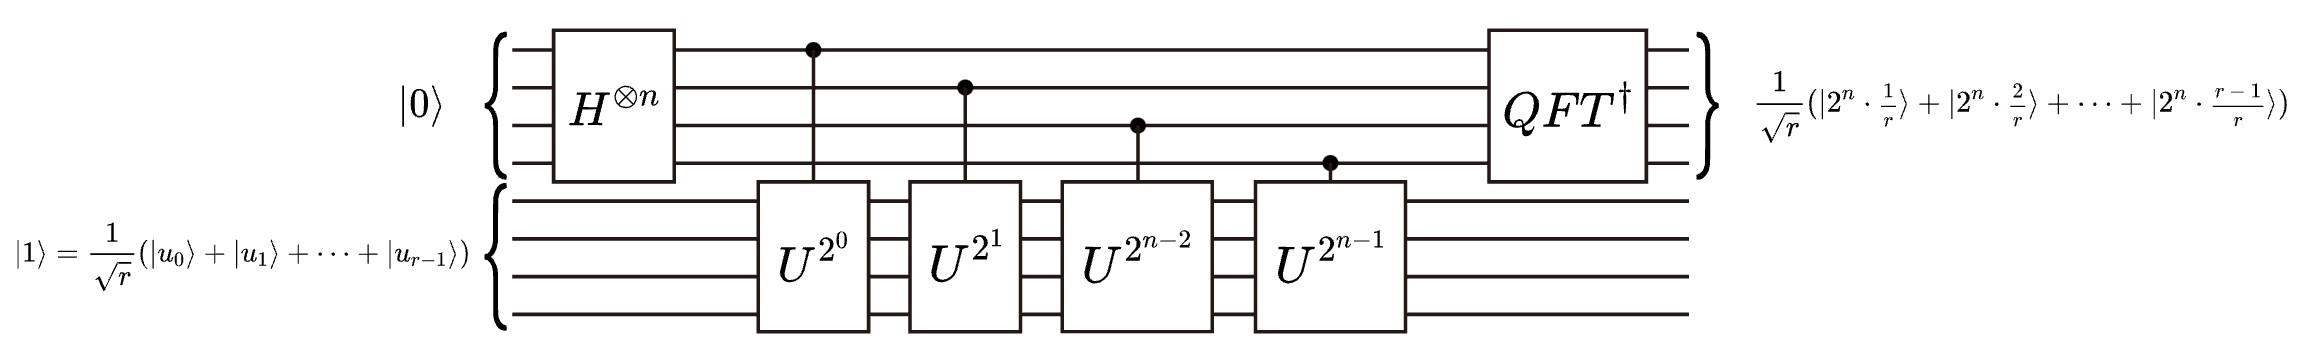

Upon measuring the ancillary register, we obtain with probability $\frac{1}{r}$ the state $|\gamma_{s} \rangle = |2^n \cdot \frac{s}{r} \rangle$, assuming that we can approximate $\phi = \frac{s}{r}$ with $n$ bits of precision (as discussed previously for the QPE algorithm). As $r$ has to be smaller than $N$, it can be shown that choosing $n = 2 \left\lceil \log_2 N \right\rceil + 1$ gives sufficient accuracy for estimating $\phi$.

After performing the measurement, we will obtain the state that represents the fraction $\frac{s}{r}$, where both $s$ and $r$ are (in principle) unknown. To understand how we can learn $r$, let us check an example first.

In general, constructing the unitary $U$ is a non-trivial task. Therefore, we will consider the same example as before: find the multiplicative order of $a=2$ modulo $N=15$ (which has as solution $r=4$), whose unitary can be implement as follows (for now, lets think about this unitary as a black-box):

In [10]:
def c_amod15(a):
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2, 4, 7, 8, 11 o 13 (coprime with 15)")
    U = QuantumCircuit(4)        
    if a in [2,13]:
        U.swap(0,1)
        U.swap(1,2)
        U.swap(2,3)
    if a in [7,8]:
        U.swap(2,3)
        U.swap(1,2)
        U.swap(0,1)
    if a in [4, 11]:
        U.swap(1,3)
        U.swap(0,2)
    if a in [7,11,13]:
        for q in range(4):
            U.x(q)
    U = U.to_gate()
    U.name = f"{a} mod 15"
    c_U = U.control()
    return c_U

In [11]:
a = 2
N = 15
m = int(np.ceil(np.log2(N)))
print(m)

# Number of qubits in the auxiliary register
n = 4

4


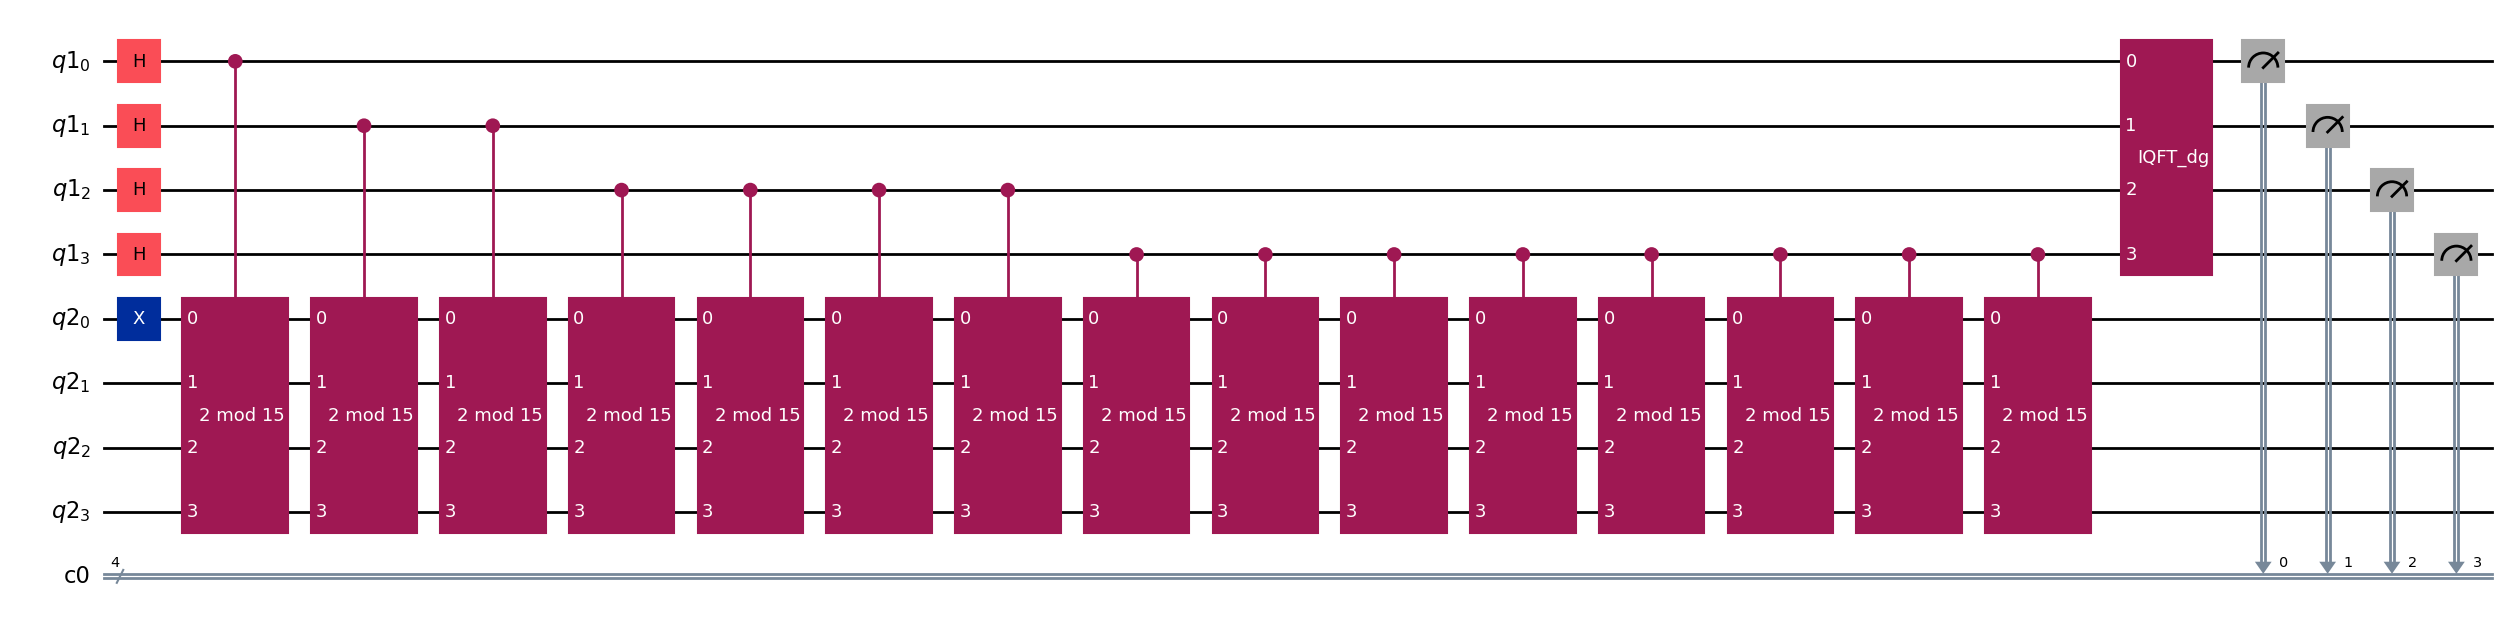

In [12]:
control_register = QuantumRegister(n)
output_register = ClassicalRegister(n)
target_register = QuantumRegister(m)

order_fact_qc = QuantumCircuit(control_register, target_register, output_register)

# Prepare |ψ> = |1> = |0001>
order_fact_qc.x(target_register[0])

# Do phase estimation
order_fact_qc.h(control_register)

for index, qubit in enumerate(control_register):
    for _ in range(2**index):
        order_fact_qc.compose(
            c_amod15(a),
            qubits=[qubit] + list(target_register),
            inplace=True,
        )

order_fact_qc.compose(QFT(n, inverse=True), range(n), inplace=True)

order_fact_qc.measure(control_register, output_register)
order_fact_qc.draw('mpl', fold=-1)

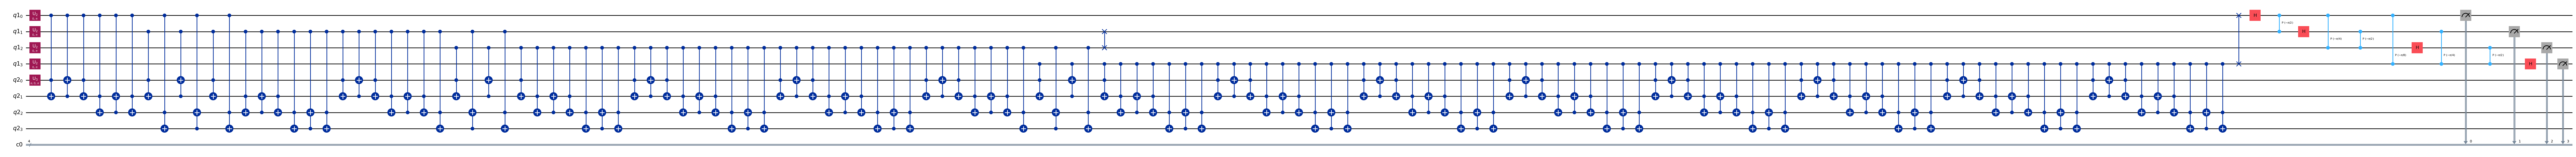

In [13]:
order_fact_qc.decompose(reps=1).draw('mpl', fold=-1)

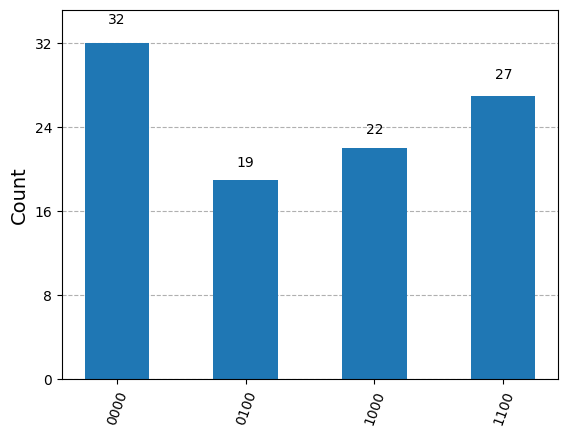

In [17]:
pm = generate_preset_pass_manager(backend=backend)
t_qc = pm.run(order_fact_qc)

answer = backend.run(t_qc, backend=backend, shots=100).result().get_counts()
plot_histogram(answer)

Clearly, we are getting the states $|\gamma_{s} \rangle = |2^n \cdot \frac{s}{r} \rangle$, each with probability $\frac{1}{r} = \frac{1}{4}$ as expected. Now, lets check which phase $\phi = \frac{y}{2^n} \approx \frac{s}{r}$ corresponds to each measured state.

In [18]:
import pandas as pd
# We will use pandas tu visualize the results in a table


rows, measured_phases = [], []
for output in answer:
    decimal = int(output, 2)                      # Binary string to decimal
    phase = decimal/(2**n)                        # Phase value
    measured_phases.append(phase)
    
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n} = {phase:.2f}"])
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

        Register Output         Phase
0  1100(bin) =  12(dec)  12/16 = 0.75
1  1000(bin) =   8(dec)   8/16 = 0.50
2  0000(bin) =   0(dec)   0/16 = 0.00
3  0100(bin) =   4(dec)   4/16 = 0.25


Finally, we can find the values of $s$ and the period $r$ using the **continued fraction algorithm**.

In [19]:
from fractions import Fraction

# Example for the case 0.666 = 2/3

Fraction(0.666).limit_denominator(15)

Fraction(2, 3)

In [20]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)            # Limit the denominator to N=15
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.75      3/4            4
1   0.50      1/2            2
2   0.00      0/1            1
3   0.25      1/4            4


Clearly, we will get **no information** if
* the phase is zero i.e. when $s=0$ (case 1).
* $s$ and $r$ are not coprime (case 2, we get $s=2$ and $r=4$).

In the other two cases, we obtain the expected result $r=4$. The easiest solution is to repeat the algorithm: Even though some values of $s$ aren't good because they share common factors with $r$, upon taking random choices of $s$, the probability that we don't guess $r$ correctly drops exponentially in the number of samples.

# The Factorization Problem and Shor's Algorithm

The **integer factorization problem**, that is, the problem of determining the prime factors of a large number, is central to modern public-key cryptography, especially **RSA encryption**. RSA's security is based on the asymmetry between the ease of multiplying two large primes and the difficulty of factoring their product. This one-way function underpins secure digital communication, banking, and identity verification.

Given the composite integer $N$, the most efficient classical algorithm for factoring large integers is the **General Number Field Sieve** (GNFS), which runs in **sub-exponential time**:
$$
\exp\left( \left( \frac{64}{9} \right)^{1/3} (\log N)^{1/3} (\log \log N)^{2/3} \right),
$$

This makes factoring large integers (e.g., 2048-bit keys) computationally infeasible, often taking years or more even on the most powerful classical machines.

On the other hand, **Shor’s algorithm**, introduced in 1994, is a (fault-tolerant) quantum algorithm that can factor integers in **polynomial time**:
$$
O((\log N)^3).$$

This provides an **exponential speedup** over GNFS. A sufficiently powerful quantum computer running Shor’s algorithm could factor large RSA keys in **minutes or hours**, posing a serious threat to currently deployed cryptographic systems.

We will see how **the order-finding problem can be used to find the factors of an integer**. For a given number $N$, we are expected to find the integer factors of $N$, that is, the prime numbers $\{a_1, a_2, \ldots, a_m\}$ such that $N = a_1 \cdot a_2 \cdot \dots a_m$.

The first step is to split $N$: find integers $b, c \geq 2$ such that $N=bc$. Once we split $N$, we continue the same process to $b$ and $c$ until all factors are prime and we obtain the prime factorization of $N$.

* If $N$ is **even**, then we simply choose $b=2$ and $c=N/2$.
* If $N$ were to be **prime**, we use a primality testing algorithm first (which has a polynomial complexity), and we are done.
* If $N$ were to be a **perfect power**, $N = p^j$ for integers $p,j \geq 2$, we can split by approximating the roots $N^{1/2}, N^{1/3}, \ldots$ (this step requires at most $\log N$ steps.)

It's good that we can do both of these things because order-finding won't help us for even numbers or for prime powers, where the number 
$s$ happens to be prime.

If $N$ is **odd and not a prime power**, order-finding allows us to split $N$ as follows:


* Randomly choose $ a \in \{2, \dots, N - 1\} $.
* Compute the greatest common divisor $ d = \gcd(a, N) $.
* If $ d > 1 $ then output $b = d $ and $ c = N/d $ and we are done. If not, we continue with order-finding.
* Let $ r $ be the order of $ a $ modulo $ N $.
* If $ r $ is even:
    *  Compute $ x = a^{r/2} - 1 \pmod{N} $.
    *  Compute $ d = \gcd(x, N) $.
    *  If $ d > 1 $ then output $ b = d $ and $ c = N/d $ and stop.
* If this point is reached, the iteration has failed to find a factor of $ N $.

We will expand on the fifth point onwards. For a given $a$ for which the multiplicative order $r$ of $a$ modulo $N$ is even, we have

$$a^r \bmod N = 1$$

which implies that

$$(a^r - 1) \bmod N = 0$$

In other words, $N$ evenly divides $a^r - 1$. Notice that,

$$a^r -1 = (a^{r/2}-1)(a^{r/2}+1)$$

Then, 

$$(a^{r/2}-1) \bmod N = 0 \quad \text{and} \quad (a^{r/2}+1) \bmod N = 0$$

Therefore, $N$ evenly divides $(a^{r/2}-1)(a^{r/2}+1)$, which implies that every prime factor of $N$ must divide either $(a^{r/2}-1)$ or $(a^{r/2}+1)$ (or both).  For a randomly selected $a$, we are likely to have prime factors of $N$ dividing both terms, which allows us to split $N$ by computing the greatest common divisor.

The algorithm fails if:
* $a \bmod N$ is odd.
* $a \bmod N$ is even and  $gcd(a^{r/2} - 1, N) = 1$

It can be shown that, for a random choice of $a$, the probability that neither of the two conditions applies is at most $2^{-m+1}$, where $m$ is the number of distinct prime factors of $N$.

Then, for $m=2$, if we repeat the process $t$ times, randomly choosing $a$ each time, we will succeed in splitting $N$ with probability $1-2^{-t}$.

Going back to our example, $N=15$, upon choosing $a=7$ we obtain the phase $\phi = \frac{s}{r} = 0.25$, and from the continued fraction algorithm we have that $r=4$.

In [ ]:
# Define the function to calculate the multiplicative order of a modulo N

def qpe_amod15(a, n):

    control_register = QuantumRegister(n)
    output_register = ClassicalRegister(n)
    target_register = QuantumRegister(m)

    order_fact_qc = QuantumCircuit(control_register, target_register, output_register)

    # Prepare |ψ> = |1>
    order_fact_qc.x(target_register[0])

    # Do phase estimation

    order_fact_qc.h(control_register)

    for index, qubit in enumerate(control_register):
        for _ in range(2**index):
            order_fact_qc.compose(
                c_amod15(a),
                qubits=[qubit] + list(target_register),
                inplace=True,
            )

    order_fact_qc.compose(QFT(n, inverse=True), range(n), inplace=True)
    order_fact_qc.measure(control_register, output_register)

    pm = generate_preset_pass_manager(backend=backend)
    t_order_fact_qc = pm.run(order_fact_qc)

    answer = backend.run(t_order_fact_qc, shots=1).result().get_counts()
    answer_dec = int([*answer][0], 2)

    return answer_dec / 2**n

In [ ]:
# Choose a value for a (at random) and the number of qubits in the auxiliary register
import random
a = random.choice([2, 4, 7, 8, 11, 13])
print("Random a = %i" % a)
n = 8

factor_found = False
attempt = 0
while not factor_found:
    attempt += 1
    print("\nAttempt %i:" % attempt)                                                
    phase = qpe_amod15(a, n)                                                        # Calculate phase
    frac = Fraction(phase).limit_denominator(N)                                     # Find r with continued fractions
    r = frac.denominator
    print("Result: r = %i" % r)
    if phase != 0:                                                                  # Discard if the phase is 0
        guesses = [np.gcd(a**(r//2)-1, N), np.gcd(a**(r//2)+1, N)]                  # Guess possible factor using gcd
        print("Guessed Factors: %i and %i" % (guesses[0], guesses[1]))
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0:                             # Check if it is a valid factor
                print("*** Non-trivial factor found: %i ***" % guess)
                factor_found = True